In [1]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
import matplotlib
import matplotlib.font_manager as fm
from scipy.stats import shapiro


df1의 정규성 검정 : (0.9094840288162231, 0.06230909377336502)
df2의 정규성 검정 : (0.8978105783462524, 0.03752673789858818)
LeveneResult(statistic=0.04810126582278468, pvalue=0.8275746090758196)
[-3.122] [0.003]


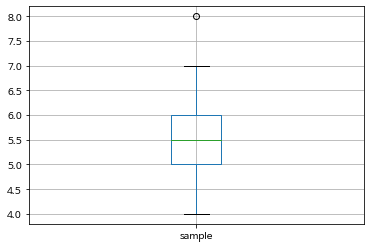

In [14]:
df1 = pd.DataFrame({"sample": [6,5,5,4,6,7,6,4,5,6,4,5,5,6,4,8,6,5,6,7]})
df2 = pd.DataFrame({"sample": [7,5,7,8,7,8,8,5,7,6,5,5,6,6,5,7,9,7,7,8]})

print("df1의 정규성 검정 :", shapiro(df1)) #0.06이니까 정규성있음
print("df2의 정규성 검정 :", shapiro(df2)) #0.03이니까 정규성없음 -> 2-sample t test에 사용불가 

print(stats.levene(df1["sample"], df2["sample"])) #등분산성 검정 ->p-value가 0.05이상이니까 등분산성 있음 ->equal_var = True값 줌

t_result = stats.ttest_ind(df1, df2, equal_var = True)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print(t,p)

df1.boxplot()



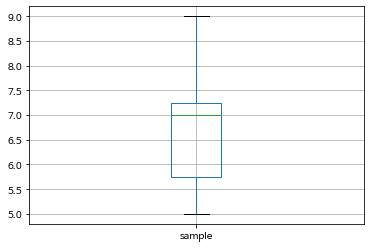

In [15]:
df2.boxplot()

In [21]:
a = pd.DataFrame({"sample": [1.883,1.715,1.799,1.768,1.711,1.832,1.427,1.344]})
b = pd.DataFrame({"sample": [1.435,1.572,1.486,1.511,1.457,1.548,1.404,1.883]})

print("A의 정규성 검정 :", shapiro(a)) #0.08이니까 정규성있음
print("B의 정규성 검정 :", shapiro(b)) #0.014이니까 정규성없음 -> 2-sample t test에 사용불가 

print(stats.levene(a["sample"], b["sample"])) #등분산성 검정 ->p-value가 0.05이상이니까 등분산성 있음 ->equal_var = True값 줌

t_result = stats.ttest_ind(a, b, equal_var = True)
t,p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("2 sample t-test")
print("t : %f" %(t))
print("p : %f" %(p))



A의 정규성 검정 : (0.8425756096839905, 0.08004552870988846)
B의 정규성 검정 : (0.7734811902046204, 0.014793740585446358)
LeveneResult(statistic=0.4408416728536036, pvalue=0.5175025061092301)
2 sample t-test
t : 1.700000
p : 0.111000


In [24]:
dfb = pd.DataFrame({"before" : [720,589,780,648,720,589,780,648,780,648]})
dfa = pd.DataFrame({"after" : [810,670,790,712,810,670,790,712,790,712]})

t_result = stats.ttest_rel(dfb,dfa)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print("t : %f" %(t))
print("p : %f" %(p))


Paired t-test
t : -5.324000
p : 0.000000


In [25]:
dfb = pd.DataFrame({"before" : [720,589,780,648,720,589,780,648,780,648]})
dfa = pd.DataFrame({"after" : [710,580,787,712,750,600,782,670,790,680]})

t_result = stats.ttest_rel(dfb,dfa)

t,p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("Paired t-test")
print("t : %f" %(t))
print("p : %f" %(p))

Paired t-test
t : -2.266000
p : 0.050000


In [34]:
count = 1500
n_obs = 10000
value = 0.1

stat, pval = proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print("stat:", stat)
print("pval:",pval)

1 Proportion test
stat: 14.002800840280093
pval: 1.4984678147052802e-44


In [39]:
count = 40
n_obs = 100
value = 0.5

stat, pval = proportions_ztest(count,n_obs,value)
print("1 Proportion test")
print("stat:", stat)
print("pval:",pval)

1 Proportion test
stat: -2.0412414523193148
pval: 0.0412268333371637


In [41]:
count = np.array([400,100])
nobs = np.array([100000,120000])

stat, pval = proportions_ztest(count, nobs)
print("2 Proportion test")
print("stat:", stat)
print("pval:", pval)

2 Proportion test
stat: 15.531094047370791
pval: 2.1370254056121516e-54


In [42]:
count = np.array([14,15])
nobs = np.array([1200,1200])

stat, pval = proportions_ztest(czzzzzzzzzzzzount, nobs)
print("2 Proportion test")
print("stat:", stat)
print("pval:", pval)zzzz

2 Proportion test
stat: -0.1868275182886637
pval: 0.8517958703082867


In [43]:
df = pd.DataFrame({"HSG":[270,260,236,234], "SS":[228,285,225,262], "SPA":[277,284,231,208]})

chi, pval,dof,expected = stats.chi2_contingency(df.T)
print("chi-square test")
print("chisq:",chi)
print("pval:",pval)
print("dof:",dof)
print("expected:",expected)


chi-square test
chisq: 13.36627391246374
pval: 0.03757449387917438
dof: 6
expected: [[258.33333333 276.33333333 230.66666667 234.66666667]
 [258.33333333 276.33333333 230.66666667 234.66666667]
 [258.33333333 276.33333333 230.66666667 234.66666667]]


In [44]:
df = pd.DataFrame({"A":[18,1,8,7,10,9,10], "B":[8,2,14,5,5,9,4], "C":[4,1,3,4,9,5,4]
                  ,"D":[4,1,2,3,2,7,3],"E":[3,1,3,1,1,1,1],"F":[3,25,8,10,2,1,7]})

chi, pval,dof,expected = stats.chi2_contingency(df.T)
print("chi-square test")
print("chisq:",chi)
print("pval:",pval)
print("dof:",dof)
print("expected:",expected)

chi-square test
chisq: 98.27432228716904
pval: 3.4707443967367598e-09
dof: 30
expected: [[11.00436681  8.52838428 10.45414847  8.25327511  7.97816594  8.80349345
   7.97816594]
 [ 8.20960699  6.36244541  7.79912664  6.15720524  5.95196507  6.56768559
   5.95196507]
 [ 5.24017467  4.06113537  4.97816594  3.930131    3.79912664  4.19213974
   3.79912664]
 [ 3.84279476  2.97816594  3.65065502  2.88209607  2.7860262   3.07423581
   2.7860262 ]
 [ 1.92139738  1.48908297  1.82532751  1.44104803  1.3930131   1.5371179
   1.3930131 ]
 [ 9.78165939  7.58078603  9.29257642  7.33624454  7.09170306  7.82532751
   7.09170306]]


one way
F : 4.263
p-value: 0.025


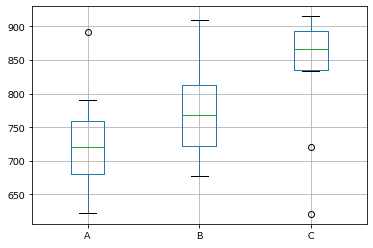

In [48]:
df = pd.DataFrame({"A":[892,623,721,678,723,790,720,670,690,771],
                  "B":[721,821,910,678,723,790,711,790,745,891],
                  "C":[621,915,888,721,894,834,841,912,845,889]})

df.boxplot(["A","B","C"])

f_result = stats.f_oneway(df['A'],df['B'],df['C'])

f,p = f_result.statistic.round(3), f_result.pvalue.round(3)

print("one way")
print("F :", f)
print("p-value:", p)

In [54]:
df = pd.read_csv("ANOVA.csv", engine="python")
df

,time,charge,gangjong,type
0,32.2,A,a,a
1,30.4,B,a,a
2,33.6,C,a,a
3,36.4,D,a,a
4,33.9,E,a,a
5,34.9,F,a,a
6,33.1,A,b,a
7,29.9,B,b,a
8,31.7,C,b,a
9,27.5,D,b,a


In [55]:
df1 = [1,2,3,4,4,5,6,6,7,8]
df2 = [23,29,49,64,74,87,96,97,109,119]

corr, pval = stats.pearsonr(df1, df2)
print("Correlation Analysis")
print("corr :%.3f" %(corr))
print("p-value:%.3f" %(pval))

Correlation Analysis
corr :0.989
p-value:0.000


In [56]:
minutes = [1,2,3,4,4,5,6,6,7,8]
units = [23,29,49,64,74,87,96,97,109,119]

minutes = sm.add_constant(minutes)
model = sm.OLS(units, minutes)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 23 Jan 2020   Prob (F-statistic):           5.82e-08
Time:                        15:35:07   Log-Likelihood:                -29.401
No. Observations:                  10   AIC:                             62.80
Df Residuals:                       8   BIC:                             63.41
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1712      3.886      1.845      0.1

/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


(0.9653438329696655, 0.8446419835090637)

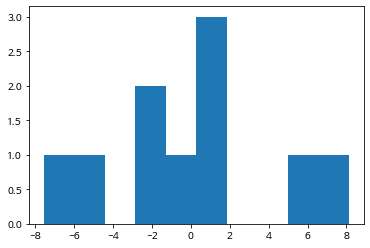

In [65]:
#정규성 검정
plt.hist(result.resid)
shapiro(result.resid)


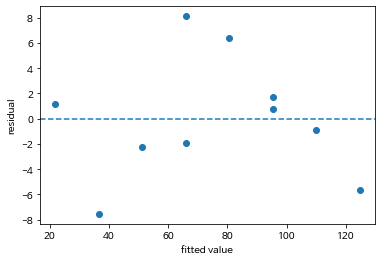

In [63]:
#등분산성 검정
plt.scatter(result.fittedvalues,result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="--")


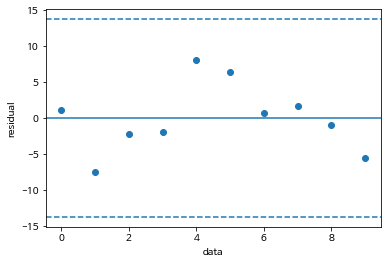

In [67]:
#독립성 검정
plt.scatter(range(0,10), result.resid, marker="o")
plt.xlabel("data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(result.resid), linestyle="--")
plt.axhline(y=-3*np.std(result.resid), linestyle = "--")


In [61]:
#더빈왓슨통계량
from statsmodels.stats.stattools import durbin_watson
durbin_watson(result.resid)

1.2832842622941938